In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
pd.pandas.set_option('display.max_columns',None)


In [2]:
# (1000,100) --> PCA --> (1000,10)
# advantages:
#     - the 10 components capture the principal components (capture most of the variance)
#     - for algorithms that calculate distance: KNN, Kmeans, lower dimmensional space outputs better results. 

In [3]:
df = pd.read_csv("nba_logreg.csv")

In [4]:
df.shape

(1340, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [6]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [7]:
df['TARGET_5Yrs'].unique()

array([0., 1.])

In [8]:
df['TARGET_5Yrs'].value_counts()

1.0    831
0.0    509
Name: TARGET_5Yrs, dtype: int64

In [9]:
## Explore if there are missing values
df.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [10]:
#3pt% has missing valuess
#zscore approach = feature -mean/std
import warnings
warnings.filterwarnings("ignore")

In [11]:
## replace missing values by median
df.fillna(df.median(),inplace=True)

In [12]:
df.isnull().sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [13]:
# Feature Scale: transform the features to a different scale:
#     1) Normalization: transforms features to a range 0 - 1
#     2) Standarization: transforms features to a Gaussian distribution with mean=0 and std=1

# When you scale the dataset, the model converges faster ---> better results

### Boxplot for outliers and  Dropping Outliers

<AxesSubplot:>

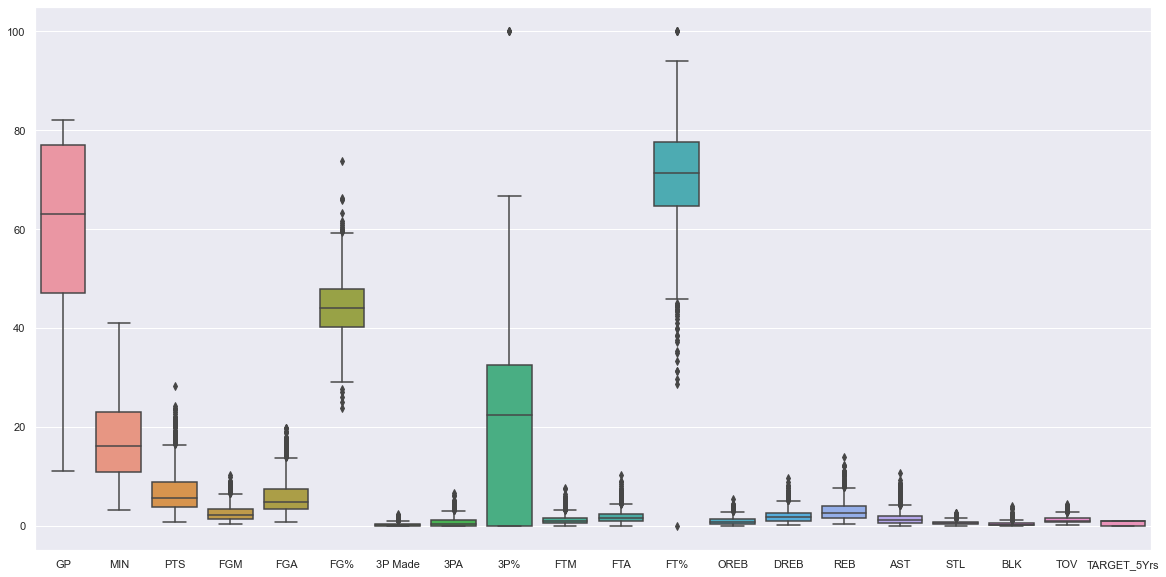

In [14]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data = df)

In [15]:
df.shape

(1340, 21)

In [ ]:
# df_woOutliers = df.drop(columns=['Name'],axis=1)
# for i in df_woOutliers.columns:
#     upper_limit = df_woOutliers[i].mean() + 3*df_woOutliers[i].std()
#     lower_limit = df_woOutliers[i].mean() - 3*df_woOutliers[i].std()
#     #print(upper_limit)
#     df_woOutliers = df_woOutliers[(df[i] < upper_limit) & (df_woOutliers[i] > lower_limit)]
# df_woOutliers.shape

## Feature Scaling

In [17]:
X=df.drop(columns=['Name','TARGET_5Yrs'],axis=1)
y=df['TARGET_5Yrs']
X.shape, y.shape

((1340, 19), (1340,))

In [18]:
# X=df_woOutliers
# y=df_woOutliers['TARGET_5Yrs']
# df_woOutliers.info()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scaled.shape,y.shape

((1340, 19), (1340,))

### Handling Oversampling for imbalance in Target Variable

In [ ]:
## if you oversample/undersample you only have to apply to the train set

In [20]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X_scaled, y)

In [21]:
y.value_counts(),y_res.value_counts()

(1.0    831
 0.0    509
 Name: TARGET_5Yrs, dtype: int64,
 0.0    831
 1.0    831
 Name: TARGET_5Yrs, dtype: int64)

(<AxesSubplot:ylabel='TARGET_5Yrs'>,)

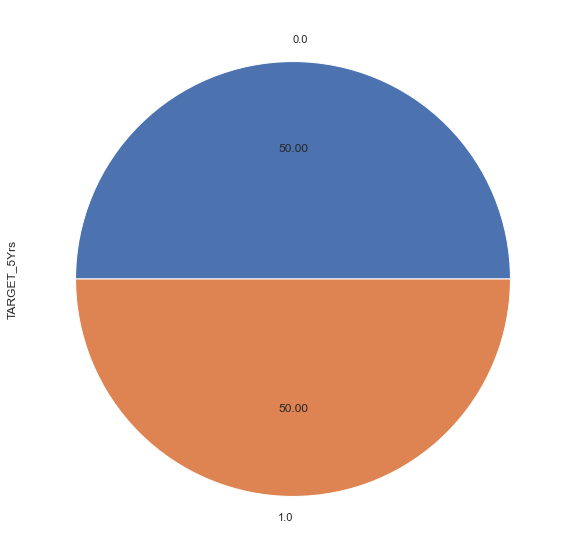

In [22]:
y_res.value_counts().plot.pie(autopct='%.2f'),

<AxesSubplot:ylabel='TARGET_5Yrs'>

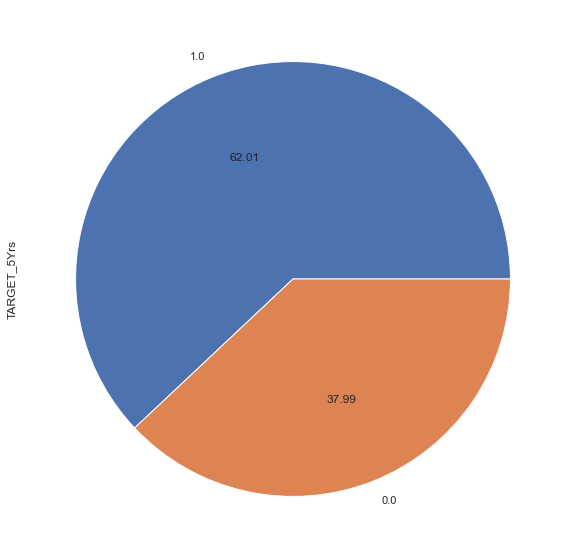

In [23]:
 y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# -1std to +1std: 68% of the dat
# -2std to +2std: 95% of the dat    
# -3std to +3std: 99% of the da

In [ ]:
#df=X_scaled.copy()

<AxesSubplot:>

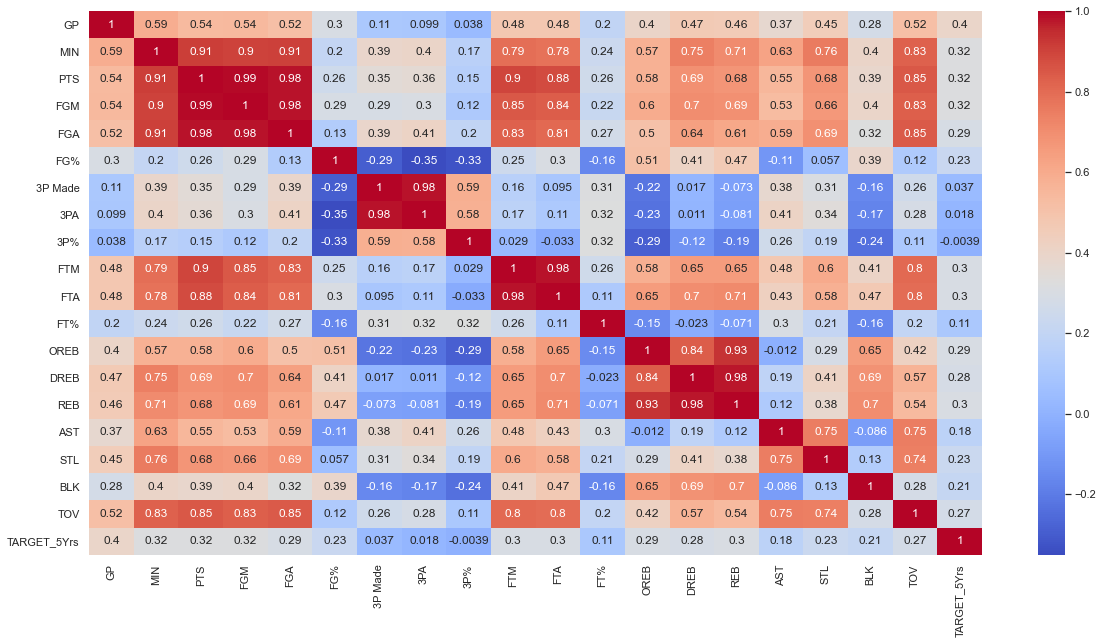

In [24]:

sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [ ]:
## Feature selection:
# 1) Get the correlation betwee each feature and the target variable. Select only the featues that have a high correlation with the target variable
# 2) Remove multi colinearity. Get the correlation between features, and keep only one of two highly correlated features.

# There are some ML algorithms which are affected by multicolinearity

In [25]:
# sns.heatmap(df_woOutliers.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

### 1. Logistic Regression

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2, random_state = 42)

NameError: name 'train_test_split' is not defined

In [33]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)
y_pred = LogReg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy,cm

(0.7388059701492538,
 array([[ 54,  45],
        [ 25, 144]]))

### 2. Random Forest

In [34]:
from sklearn.datasets import make_classification

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators=300) 
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
accuracy

0.7014925373134329

#### Hyperparameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import time

n_estimators_range = [50,100,200,500]
max_depth_range=[5,10,20]
min_samples_split_range = [5,10,20,50]
param_grid = dict(max_depth=max_depth_range, min_samples_split=min_samples_split_range,n_estimators=n_estimators_range)

rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [38]:
grid.fit(X_train, y_train)
# print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [5, 10, 20, 50],
                         'n_estimators': [50, 100, 200, 500]})

In [39]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_depth': 10, 'min_samples_split': 50, 'n_estimators': 100} with a score of 0.69


In [41]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth =10,min_samples_split=10) 
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
accuracy

0.7164179104477612

### 3. Neural Network

In [ ]:
# pip install tensorflow

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import tensorflow as tf

In [43]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2, random_state = 42)

In [44]:
X_new=X_scaled[['GP','PTS','3P%','REB','STL','AST','TOV']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2, random_state = 42)

In [46]:
model=Sequential()
model.add(Dense(64,input_dim=X_train.shape[1],activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [47]:
# activation function: include non linear behavior to the model
# - relu: hidden layers --> transforms negative values to 0
# - sigmoid: output layer when we have binary classification. it will output a probability 0-1

In [48]:
# a common patten for the number of layers multiple of a power of 2
# 64 = 2^5
# 32 = 2^4

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [50]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
# early stop --> set a rule that stops when we meet certain condition
# val_accuracy>0.75 --> stop

In [52]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__() 
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True
            
my_callback = MyThresholdCallback(threshold=0.75)

In [53]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=128,callbacks=[my_callback])

Epoch 1/50
9/9 [==============================] - 1s 26ms/step - loss: 0.8488 - accuracy: 0.3834 - val_loss: 0.7457 - val_accuracy: 0.3694
Epoch 2/50
9/9 [==============================] - 0s 5ms/step - loss: 0.7274 - accuracy: 0.4328 - val_loss: 0.6852 - val_accuracy: 0.5224
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6808 - accuracy: 0.5354 - val_loss: 0.6399 - val_accuracy: 0.6978
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 0.6628 - accuracy: 0.6026 - val_loss: 0.6057 - val_accuracy: 0.7090
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 0.6250 - accuracy: 0.6576 - val_loss: 0.5785 - val_accuracy: 0.7090
Epoch 6/50
9/9 [==============================] - 0s 5ms/step - loss: 0.6223 - accuracy: 0.6679 - val_loss: 0.5613 - val_accuracy: 0.7090
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.6110 - accuracy: 0.6791 - val_loss: 0.5486 - val_accuracy: 0.7164
Epoch 8/50
9/9 [=================

In [54]:
test_loss,test_acc=model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.7500


In [55]:
test_acc

0.75

In [56]:
## Unsupervised learning
# Cluster X_train --> we get cluster for each variable
# Compare such cluster assignment with the target variable (ground truth)


## Anomaly detection
# you build two clusters with their known labels. 
# You have a new player and you compare the distance with the center of clusters, if it is closer to cluster 1, then it is 1, if closer to 0 then it is 0


In [57]:
# pip install xgboost

### 4. Gradient Boost

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gbc = GradientBoostingClassifier(n_estimators=200) 
gbc.fit(X_train,y_train)
y_pred2 = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
accuracy

0.7052238805970149

### 5. XGBoost

In [60]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)
y_pred3 = xg_reg.predict(X_test)

[20:04:45] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [61]:
cm = confusion_matrix(y_test, y_pred3)
accuracy = accuracy_score(y_test, y_pred3)
accuracy

0.7388059701492538

### 6. Oversampling + Random Forest

In [62]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

In [63]:
y_train.value_counts()

1.0    662
0.0    410
Name: TARGET_5Yrs, dtype: int64

In [64]:
y_train_over.value_counts()

0.0    662
1.0    662
Name: TARGET_5Yrs, dtype: int64

In [65]:
rfc = RandomForestClassifier(n_estimators=300) 
rfc.fit(X_train_over,y_train_over)
y_pred2 = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
accuracy

0.7201492537313433

In [1]:
#plot_confusion_matrix(rfc, X_test, y_test);

### 7. Oversampling + Neural Network

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
import tensorflow as tf

In [67]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2, random_state = 42)

In [68]:
X_new=X[['GP','PTS','3P%','REB','STL','AST','TOV']]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.2, random_state = 42)

In [90]:
y.value_counts(normalize=True)

1.0    0.620149
0.0    0.379851
Name: TARGET_5Yrs, dtype: float64

In [91]:
y_train.value_counts(normalize=True)

1.0    0.617537
0.0    0.382463
Name: TARGET_5Yrs, dtype: float64

In [92]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

In [98]:
model=Sequential()
model.add(Dense(64,input_dim=X_train.shape[1],activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [99]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                1280      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [100]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [101]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True
            
my_callback = MyThresholdCallback(threshold=0.74)

In [102]:
model.fit(X_train_over,y_train_over,validation_data=(X_test,y_test),epochs=50,callbacks=[my_callback])

Epoch 1/50
42/42 [==============================] - 1s 5ms/step - loss: 0.6697 - accuracy: 0.5989 - val_loss: 0.5630 - val_accuracy: 0.7127
Epoch 2/50
42/42 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.6669 - val_loss: 0.5683 - val_accuracy: 0.7127
Epoch 3/50
42/42 [==============================] - 0s 2ms/step - loss: 0.6081 - accuracy: 0.6775 - val_loss: 0.5518 - val_accuracy: 0.7201
Epoch 4/50
42/42 [==============================] - 0s 2ms/step - loss: 0.6012 - accuracy: 0.6820 - val_loss: 0.5552 - val_accuracy: 0.7239
Epoch 5/50
42/42 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.6903 - val_loss: 0.5665 - val_accuracy: 0.7164
Epoch 6/50
42/42 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.6911 - val_loss: 0.5524 - val_accuracy: 0.7276
Epoch 7/50
42/42 [==============================] - 0s 2ms/step - loss: 0.5843 - accuracy: 0.7115 - val_loss: 0.5575 - val_accuracy: 0.7201
Epoch 8/50
42/42 [==

In [103]:
test_loss,test_acc=model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.7463


In [104]:
test_acc

0.746268630027771

### 8. PCA + XGBoost

In [105]:
from sklearn.decomposition import PCA

In [106]:
pca=PCA(n_components=5)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [107]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train_pca,y_train)
y_pred3 = xg_reg.predict(X_test_pca)

[20:09:21] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [108]:
cm = confusion_matrix(y_test, y_pred3)
accuracy = accuracy_score(y_test, y_pred3)
accuracy

0.7350746268656716

In [110]:
from sklearn.metrics import plot_confusion_matrix

In [109]:
cm

array([[ 47,  52],
       [ 19, 150]])

In [ ]:
# TN: 47

### 9. Feature selection

Select features based on the correlation with the target variable

In [118]:
output=df.corr()[['TARGET_5Yrs']]
output

,TARGET_5Yrs
GP,0.396833
MIN,0.317805
PTS,0.315981
FGM,0.317594
FGA,0.292660
FG%,0.227134
3P Made,0.036619
3PA,0.018110
3P%,-0.003937
FTM,0.296841


In [3]:
#output.query("TARGET_5Yrs>0.27") ## filter data based on a condition

In [131]:
# output.query("TARGET_5Yrs>0.27").iloc[:-1]

In [120]:
#output[output['TARGET_5Yrs']>0.27] ## filter data based on a condition

,TARGET_5Yrs
GP,0.396833
MIN,0.317805
PTS,0.315981
FGM,0.317594
FGA,0.292660
FTM,0.296841
FTA,0.296089
OREB,0.293307
DREB,0.284677
REB,0.299406


In [121]:
output[output['TARGET_5Yrs']>0.27].iloc[:-1].index

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FTM', 'FTA', 'OREB', 'DREB', 'REB',
       'TOV'],
      dtype='object')

In [122]:
X_new_cor=X_scaled[['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FTM', 'FTA', 'OREB', 'DREB', 'REB','TOV']]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_new_cor,y, test_size = 0.2, random_state = 42)

In [124]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)
y_pred3 = xg_reg.predict(X_test)

[20:13:00] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [125]:
cm = confusion_matrix(y_test, y_pred3)
accuracy = accuracy_score(y_test, y_pred3)
accuracy

0.7089552238805971

In [126]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)
y_pred = LogReg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy,cm

(0.7425373134328358,
 array([[ 58,  41],
        [ 28, 141]]))